# pycoinone Examples

맨 먼저 사용할 API들을 죄다 import합니다.

In [1]:
from coinone.api import *

## Create API object

사용할 API 객체를 생성해 봅시다. `ACCESS_KEY`, `SECRET_KEY` 는 [Coinone API](https://coinone.co.kr/developer/) 사이트에서 발급받읍시다.

V1이나 V2 중 마음에 드는 것을 발급받으면 됩니다. 일단 아래에서는 v2를 사용한다고 가정하겠습니다.

In [2]:
v1 = CoinoneV1('ACCESS_KEY_V1')
v2 = CoinoneV2('ACCESS_KEY_V2', 'SECRET_KEY_V2')

## Account API set

### Balance

가장 소중한 여러분의 가상화폐 잔액을 확인해봅시다.

In [3]:
v2.account.balance()

API 호출 결과를 `jupyter notebook`에 찍으면 위에 보이는거처럼 표로 만들어 보여줍니다. 각 원소를 직접 확인하고 싶다면 다음의 두 방법 중 마음에 드는 것으로 할 수 있습니다.

In [4]:
# First method
v2.account.balance().krw.avail

# Second method
balance = v2.account.balance()
balance.krw.avail

24421

둘 다 똑같으니 맘에 드는 걸로 쓰세요.

어쨌든, 각 원소를 확인하는 법은 다 똑같으니 이 후로는 생락하겠습니다.

### Daily Balance

In [5]:
v2.account.daily_balance()

### Deposit Address

가상화폐 입금 계좌 정보를 알아봅시다.

In [6]:
v2.account.deposit_address()

{'errorCode': '0',
 'result': 'success',
 'walletAddress': {'bch': None,
  'btc': None,
  'etc': '0x9408138DD862BBA38FE021381BA5D00DFCA8F6FE',
  'eth': '0xD5D87E66DF4F6E611D44F27DED6D6F67BF0B316B',
  'iota': None,
  'ltc': None,
  'qtum': None,
  'xrp': 'rp2diYfVtpbgEMyaoWnuaWgFCAkqCAEg28',
  'xrp_tag': '1339562854'}}

### User Information

내 계정의 정보도 한번 알아봅시다.

In [7]:
v2.account.user_info()

### Virtual Account

그럼 이제 입금용 가상계좌 정보도 확인해봅시다.

In [8]:
v2.account.virtual_account()

Field,Value
result,'success'
errorCode,'0'
accountNumber,'00000000000000 '
depositor,'코인원거래소'
bankName,'산업은행'


## Order

Order API는 매우 조심히 다뤄야 합니다. 여러분의 소중한 가상화폐를 *마음대로* 사고 팔 수 있거든요. Transaction API 들도 가상화폐를 넣고 뺄 수 있지만, 이중 인증을 쓰기 때문에 Order API와는 다릅니다.

혹시나 이 노트북을 run all로 실행하실 분이 계실지 모르니, 이쯤에서 잠깐 쉬었다 가죠.

In [9]:
raise KeyboardInterrupt

KeyboardInterrupt: 

### Limit Buy

가상화폐를 사려면 가상화폐 종류와 원화 가격, 그리고 사려는 양을 명시해서 API를 부르면 됩니다.

In [10]:
v2.order.limit_buy(currency=Currency.BTC, price=1000, qty=0.001)

Field,Value
result,'success'
errorCode,'0'
orderId,'c2956e15-f0b8-45e8-ad14-3d90c765e414'


음... 1 BTC를 1000 KRW 에 사려면 대강 언제쯤까지 거슬러올라가야 될까요... 뭐, 상관 없겠죠.

위의 코드는 다음처럼 쓸 수도 있습니다.

In [11]:
v2.order[Currency.BTC].limit_buy(price=1000, qty=0.001)

Field,Value
result,'success'
errorCode,'0'
orderId,'372f8b4c-ec05-435e-881f-308ed31a5109'


order API 객체의 기본 가상화폐 종류를 `[]`을 통해서 지정할 수 있습니다.

### Limit Sell

파는 것도 그다지 새로울 건 없습니다.

In [12]:
v2.order.limit_sell(currency=Currency.BTC, price=50_000_000, qty=0.001)

Field,Value
result,'success'
errorCode,'0'
orderId,'61a60139-b1f9-4b5d-be12-1abeb43da1bf'


꿈은 높게 가지는게 좋죠!

### My Limit Orders

이제 위에서 넣었던 주문들을 한번 확인해봅시다.

In [13]:
v2.order.limit_orders(currency=Currency.BTC)

### Cancel Order

이제 높은 꿈을 담았던 주문을 취소해볼까요?

In [14]:
v2.order.cancel(order_id='372f8b4c-ec05-435e-881f-308ed31a5109', price=1000, qty=0.001, is_ask=OrderType.Bid)

Field,Value
result,'success'
errorCode,'0'


`order_id`에는 `limit_orders()`나 `limit_buy()`/`limit_sell()`에서 얻은 `orderId` 값을 넣고, `price`는 그 거래에서 썼던 `price`값을 똑같이 써 넣습니다.

물론 양을 나눠서 일부만 취소할 수도 있습니다.

In [15]:
v2.order.cancel(order_id='c2956e15-f0b8-45e8-ad14-3d90c765e414', price=1000, qty=0.0005, is_ask=OrderType.Bid)
v2.order.cancel(order_id='c2956e15-f0b8-45e8-ad14-3d90c765e414', price=1000, qty=0.0003, is_ask=OrderType.Bid)
v2.order.limit_orders(currency=Currency.BTC)

남은 주문을 일괄적으로 취소하려면, `python`의 도움이 조금 필요합니다.

In [16]:
for order in v2.order.limit_orders(currency=Currency.BTC).limitOrders:
    v2.order.cancel(order_id=order.orderId, price=order.price, qty=order.qty,
                    is_ask=OrderType.Bid if order.type == 'bid' else OrderType.Ask)

### My Complete Orders

우리의 희로애락이 담긴 완료된 거래 내역도 한번 조회해 봅시다.

In [17]:
v2.order.complete_orders(currency=Currency.BTC)

## Public

### Orderbook

지금 핫한 거래들은 뭐가 있는지 한번 봅시다.

In [18]:
v2.orderbook(currency=Currency.BTC)

### Recent Complete Orders

우리가 API질을 하는 동안 가상화폐들이 어떻게 팔려나갔나 한번 볼까요?

In [19]:
v2.trades(currency=Currency.BTC)

### Ticker

시세를 확인하는 것도 거래의 기본이죠.

In [20]:
v2.ticker(currency=Currency.BTC)

Field,Value
high,14035000
low,13151000
last,13933000
first,13455000
volume,6913.1641
yesterday_high,13546000
yesterday_low,12780000
yesterday_last,13387500
yesterday_first,13305500
yesterday_volume,7784.7351


In [21]:
v2.ticker_all()

## Transaction

### Coin Transactions History

가상화폐들 주고받은 흔적을 보자구요.

In [22]:
v2.transaction.history(currency=Currency.BTC)

Field,Value
result,'success'
errorCode,'0'
transactions,


### KRW Transactions History

이젠 원화도 볼 차례입니다!

In [23]:
v2.transaction.krw.history()

### 2-Factor Authentication

송금은 너무나도 위험한 작업이라 반드시 이중인증을 거쳐야됩니다. 인증번호부터 먼저 쏴보죠.

실행하기 전에 먼저 핸드폰을 찾아두시는걸 추천해요.

In [24]:
v2.transaction.auth_number(type=Currency.BTC)

Field,Value
result,'success'
errorCode,'0'


### Send Coin 

이 API는 이 문서가 작성된 2017년 12월 5일 당시 아직 open되지 않았습니다.

In [25]:
if False:
    v2.transaction.coin(currency=Currency.BTC, address='', auth_number=0, qty=0.0001)

## Conclusion

자, API 설명은 여기까지입니다. 이제 여러분만의 *로보어드바이저*를 만들어보세요 !

![Donate 0.0001 BTC][donate]


by [gwangyi](bitcoin:1Kpe6efEdxrjuDPKGYLN8NzqPJ4YQA4xm1?amount=0.0001)


[donate]: 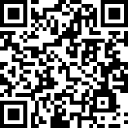